In [1]:
#Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### I - Virat Kohli Dataset

In [2]:
df = pd.read_csv("virat.csv")

In [3]:
df.head()

Runs Mins  BF  4s  6s     SR  Pos Dismissal  Inns   Opposition  \
0   12   33  22   1   0  54.54    2       lbw     1  v Sri Lanka   
1   37   82  67   6   0  55.22    2    caught     2  v Sri Lanka   
2   25   40  38   4   0  65.78    1   run out     1  v Sri Lanka   
3   54   87  66   7   0  81.81    1    bowled     1  v Sri Lanka   
4   31   45  46   3   1  67.39    1       lbw     2  v Sri Lanka   

          Ground Start Date  
0       Dambulla  18-Aug-08  
1       Dambulla  20-Aug-08  
2  Colombo (RPS)  24-Aug-08  
3  Colombo (RPS)  27-Aug-08  
4  Colombo (RPS)  29-Aug-08

#### Spread in Runs
Question 1: Analyse the spread of Runs scored by Virat in all his matches and report the difference between the scores at the 50th percentile and the 25th percentile respectively.

    a)16.5
    b)22.5
    c)26.5
    d)32.5



In [4]:
## Your code here
df.dtypes

Runs          object
Mins          object
BF             int64
4s             int64
6s             int64
SR            object
Pos            int64
Dismissal     object
Inns           int64
Opposition    object
Ground        object
Start Date    object
dtype: object

In [5]:
df.Runs = df.Runs.apply(lambda x: x.replace('*', '') if '*' in x else x)

In [6]:
df.Runs = df.Runs.astype("int32")
df.Runs.describe(percentiles = [0.25, 0.5, 1])
df.Runs.describe()

count    132.000000
mean      46.848485
std       41.994635
min        0.000000
25%       10.000000
50%       32.500000
75%       80.250000
max      154.000000
Name: Runs, dtype: float64

#### Box Plots

Question 2: Plot a Box Plot to analyse the spread of Runs that Virat has scored. The upper fence in the box plot lies in which interval?

    a)100-120
    b)120-140
    c)140-160
    d)160-180


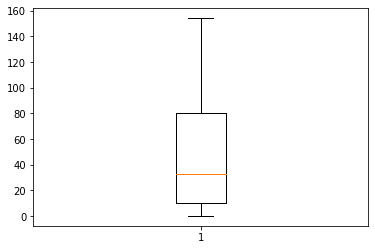

In [7]:
#Your code here
plt.boxplot(df.Runs)
plt.show()

#### False Statement

Q3:Consider the following statements and choose the correct option

     I - Virat has played the maximum number of matches in 2011
     II - Virat has the highest run average in the year 2017
     III - Virat has the maximum score in a single match and the highest run average in the year 2016.

Which of the above statements is/are false?

    a)I and II
    b)I and III
    c)II
    d)III



In [8]:
## Your code herepd
df['Year'] = pd.DatetimeIndex(df['Start Date']).year
df.groupby('Year').max()

df['Year'].value_counts()
print (pd.pivot_table(df, values='Runs', columns=['Year'], aggfunc=np.mean))
print (pd.pivot_table(df, values='Runs', columns=['Year'], aggfunc=np.max))

Year  2008       2009    2010  2011       2012       2013       2014  2015  \
Runs  31.8  38.333333  45.375  42.0  40.363636  47.826087  58.529412  30.4   

Year  2016       2017  
Runs  73.9  61.666667  
Year  2008  2009  2010  2011  2012  2013  2014  2015  2016  2017
Runs    54   107   118   117   128   115   139   138   154   122


#### Maximum Frequency

Q4:Plot a histogram for the Mins column with 15 bins. Among the three ranges mentioned below, which one has the highest frequency?

A - [54.6,68)

B - [68,81.4)

C - [121.6,135)

    a)A - [54.6,68)
    b)B - [68,81.4)
    c)C - [121.6,135)
    d)All the bin ranges have the same frequency


In [9]:
#Your code here
df = df[~(df['Mins']== "-")]
df['Mins'] = df['Mins'].apply(lambda x: int(x))

In [10]:
df.Mins.dtype

dtype('int32')

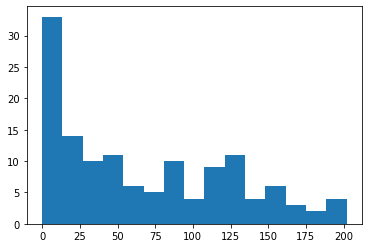

In [12]:
plt.hist(df.Mins, bins = 15)
plt.show()